In [ ]:
# ! pip install -q kaggle

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import os
# os.environ['username'] = "rekhalodhi" # username from the json file
# os.environ['key'] = "b3a5d08ff70b9f6c085a23d12bc9b1a0" # key from the json file

In [ ]:
# !kaggle datasets download -d wordsforthewise/lending-club

 98% 1.24G/1.26G [00:10<00:00, 139MB/s]
100% 1.26G/1.26G [00:10<00:00, 124MB/s]


In [2]:
pwd

'/content'

In [3]:
!ls

drive  sample_data


In [4]:
%cd /content/drive/MyDrive/major_project

/content/drive/MyDrive/major_project


In [5]:
pwd

'/content/drive/MyDrive/major_project'

In [ ]:
# !unzip '/content/lending-club.zip' -d '/content/drive/MyDrive/major_project/data/'

In [6]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
accepted_file_path = r'/content/drive/MyDrive/major_project/data/accepted_2007_to_2018q4.csv/accepted_2007_to_2018Q4.csv'
rejected_file_path = r'/content/drive/MyDrive/major_project/data/rejected_2007_to_2018q4.csv/rejected_2007_to_2018Q4.csv'

In [8]:
df_accepted = pd.read_csv(accepted_file_path, low_memory = True)
df_rejected = pd.read_csv(rejected_file_path)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
df_accepted.shape

(2260701, 151)

In [10]:
pd.set_option('display.max_rows',151)
pd.set_option('display.max_columns',151)

In [ ]:
df_accepted.head(5)

In [ ]:
df_accepted.columns

In [ ]:
df_accepted['loan_status'].unique()

array(['Fully Paid', 'Current', 'Charged Off', 'In Grace Period',
       'Late (31-120 days)', 'Late (16-30 days)', 'Default', nan,
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [ ]:
df_accepted['loan_status'].value_counts(dropna=False)

Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
NaN                                                         33
Name: loan_status, dtype: int64

In [12]:
df_accepted = df_accepted.loc[df_accepted['loan_status'].isin(['Fully Paid', 'Charged Off', 'default', 'Does not meet the credit policy. Status:Fully Paid', 'Does not meet the credit policy. Status:Charged Off'])]

In [ ]:
len(list(df_accepted['title'].unique()))

63153

In [ ]:
np.sort(df_accepted['purpose'].unique())

array(['car', 'credit_card', 'debt_consolidation', 'educational',
       'home_improvement', 'house', 'major_purchase', 'medical', 'moving',
       'other', 'renewable_energy', 'small_business', 'vacation',
       'wedding'], dtype=object)

In [ ]:
df_accepted['pymnt_plan'].unique()

array(['n'], dtype=object)

In [ ]:
np.sort(df_accepted['grade'].unique())

array(['A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype=object)

In [ ]:
df_accepted['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [ ]:
np.sort(df_accepted['sub_grade'].unique())

array(['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1',
       'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3',
       'G4', 'G5'], dtype=object)

In [ ]:
df_accepted.info(verbose=True, null_counts=True)

In [ ]:
df_accepted.shape

(1348059, 151)

In [ ]:
df_accepted.describe().T

In [13]:
df_accepted['loan_status'].value_counts(dropna=False)

Fully Paid                                             1076751
Charged Off                                             268559
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Name: loan_status, dtype: int64

In [ ]:
df_accepted.isnull().sum()     

In [14]:
def null_values(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * mis_val / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename( columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[ mis_val_table_ren_columns.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(2)
        print ("Dataframe has " + str(df.shape[1]) + " columns.\n"  "There are " + str(mis_val_table_ren_columns.shape[0]) +  " columns that have missing values.")
        return mis_val_table_ren_columns

In [15]:
miss_values_accepted = null_values(df_accepted)
miss_values_accepted.head()

Dataframe has 151 columns.
There are 113 columns that have missing values.


,Missing Values,% of Total Values
member_id,1348059,100.00
next_pymnt_d,1345310,99.80
orig_projected_additional_accrued_interest,1344300,99.72
hardship_status,1342305,99.57
hardship_length,1342305,99.57


In [16]:
df_accepted_dropped = df_accepted.drop(df_accepted.loc[:, df_accepted.isna().mean().sort_values() > 0.5].columns, axis=1)

In [17]:
df_accepted_dropped.shape

(1348059, 93)

In [ ]:
miss_values_accepted = null_values(df_accepted_dropped)
miss_values_accepted.head()

Dataframe has 93 columns.
There are 55 columns that have missing values.


,Missing Values,% of Total Values
mths_since_recent_inq,176820,13.12
num_tl_120dpd_2m,120150,8.91
mo_sin_old_il_acct,108324,8.04
emp_title,85944,6.38
emp_length,78545,5.83


In [18]:
unneeded_columns = ['id', 'grade', 'emp_title', 'url', 'title', 'zip_code']

In [19]:
df_accepted_dropped = df_accepted_dropped.drop(unneeded_columns, axis=1)

In [ ]:
{column: list(df_accepted_dropped[column].unique()) for column in df_accepted_dropped if df_accepted_dropped.dtypes[column] == 'object'}

In [ ]:
df_accepted_dropped.shape

(1348059, 87)

In [20]:
df_accepted_dropped = df_accepted_dropped.drop(['hardship_flag', 'pymnt_plan'], axis=1)

In [21]:
df_accepted_dropped.select_dtypes('object').head()

,term,sub_grade,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,last_credit_pull_d,application_type,disbursement_method,debt_settlement_flag
0,36 months,C4,10+ years,MORTGAGE,Not Verified,Dec-2015,Fully Paid,debt_consolidation,PA,Aug-2003,w,Jan-2019,Mar-2019,Individual,Cash,N
1,36 months,C1,10+ years,MORTGAGE,Not Verified,Dec-2015,Fully Paid,small_business,SD,Dec-1999,w,Jun-2016,Mar-2019,Individual,Cash,N
2,60 months,B4,10+ years,MORTGAGE,Not Verified,Dec-2015,Fully Paid,home_improvement,IL,Aug-2000,w,Jun-2017,Mar-2019,Joint App,Cash,N
4,60 months,F1,3 years,MORTGAGE,Source Verified,Dec-2015,Fully Paid,major_purchase,PA,Jun-1998,w,Jul-2016,Mar-2018,Individual,Cash,N
5,36 months,C3,4 years,RENT,Source Verified,Dec-2015,Fully Paid,debt_consolidation,GA,Oct-1987,w,May-2017,May-2017,Individual,Cash,N


Check employement length and set values 0 for smaller than 1 emp_length and 11 for greater than 10 value

In [ ]:
df_accepted_dropped['emp_length'].unique()

array(['10+ years', '3 years', '4 years', '6 years', '7 years', '8 years',
       '2 years', '5 years', '9 years', '< 1 year', '1 year', nan],
      dtype=object)

In [22]:
df_accepted_dropped['emp_length'] = df_accepted_dropped['emp_length'].replace({'< 1 year': '0 years', '10+ years': '11 years'})

In [ ]:
df_accepted_dropped.head()

In [ ]:
df_accepted_dropped.columns.sort_values()

Index(['acc_now_delinq', 'acc_open_past_24mths', 'addr_state', 'annual_inc',
       'application_type', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_within_12_mths', 'collection_recovery_fee',
       'collections_12_mths_ex_med', 'debt_settlement_flag', 'delinq_2yrs',
       'delinq_amnt', 'disbursement_method', 'dti', 'earliest_cr_line',
       'emp_length', 'fico_range_high', 'fico_range_low', 'funded_amnt',
       'funded_amnt_inv', 'home_ownership', 'initial_list_status',
       'inq_last_6mths', 'installment', 'int_rate', 'issue_d',
       'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low',
       'last_pymnt_amnt', 'last_pymnt_d', 'loan_amnt', 'loan_status',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_inq', 'num_accts_ever_120_pd', 'num_actv_bc_tl',
       'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl',
       'num_

In [ ]:
miss_values_accepted = null_values(df_accepted_dropped)
miss_values_accepted.head(52)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


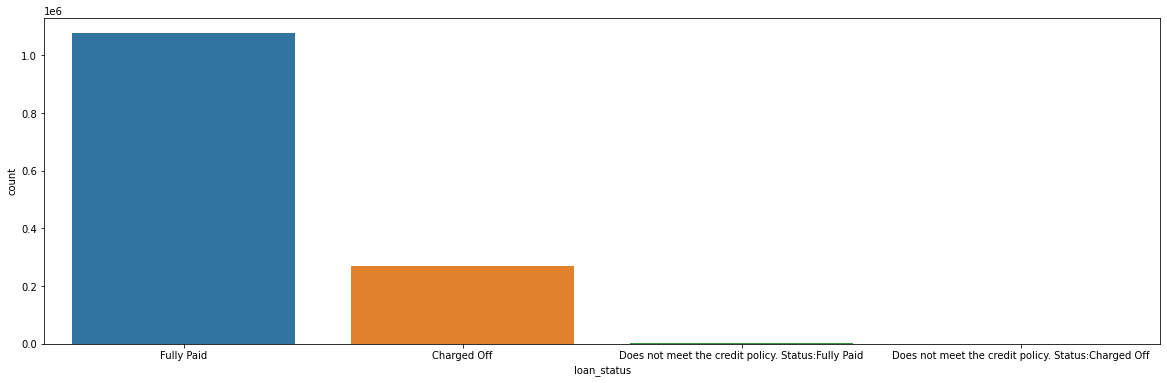

In [23]:
plt.figure(figsize = (20,6))
sns.countplot(df_accepted.loan_status)

In [24]:
keep_list = ['annual_inc','avg_cur_bal', 'dti', 'emp_length','fico_range_low', 'sub_grade', 'home_ownership', 'initial_list_status',
       'installment', 'int_rate', 'loan_amnt', 'loan_status', 'mort_acc', 'pub_rec', 'purpose', 'revol_util', 'term', 'verification_status']

In [ ]:
len(keep_list)

18

In [25]:
drop_list = [col for col in df_accepted_dropped.columns if col not in keep_list]
print(drop_list)

['funded_amnt', 'funded_amnt_inv', 'issue_d', 'addr_state', 'delinq_2yrs', 'earliest_cr_line', 'fico_range_high', 'inq_last_6mths', 'open_acc', 'revol_bal', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'acc_open_past_24mths', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mths_since_recent_bc', 'mths_since_recent_inq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'nu

In [26]:
df_accepted_dropped.drop(labels=drop_list, axis=1, inplace=True)

In [27]:
df_accepted_dropped.shape

(1348059, 18)

In [28]:
df_accepted_dropped.columns.sort_values()

Index(['annual_inc', 'avg_cur_bal', 'dti', 'emp_length', 'fico_range_low',
       'home_ownership', 'initial_list_status', 'installment', 'int_rate',
       'loan_amnt', 'loan_status', 'mort_acc', 'pub_rec', 'purpose',
       'revol_util', 'sub_grade', 'term', 'verification_status'],
      dtype='object')

In [104]:
{column: list(df_accepted_dropped[column].unique()) for column in df_accepted_dropped if df_accepted_dropped.dtypes[column] == 'object'}

{'emp_length': ['11 years',
  '3 years',
  '4 years',
  '6 years',
  '7 years',
  '8 years',
  '2 years',
  '5 years',
  '9 years',
  '0 years',
  '1 year',
  nan],
 'home_ownership': ['MORTGAGE', 'RENT', 'OWN', 'ANY', 'NONE', 'OTHER'],
 'initial_list_status': ['w', 'f'],
 'loan_status': ['Fully Paid',
  'Charged Off',
  'Does not meet the credit policy. Status:Fully Paid',
  'Does not meet the credit policy. Status:Charged Off'],
 'purpose': ['debt_consolidation',
  'small_business',
  'home_improvement',
  'major_purchase',
  'credit_card',
  'other',
  'house',
  'vacation',
  'car',
  'medical',
  'moving',
  'renewable_energy',
  'wedding',
  'educational'],
 'sub_grade': ['C4',
  'C1',
  'B4',
  'F1',
  'C3',
  'B2',
  'B1',
  'A2',
  'B5',
  'C2',
  'E2',
  'A4',
  'E3',
  'C5',
  'A1',
  'D4',
  'F3',
  'D1',
  'B3',
  'D3',
  'D5',
  'A5',
  'F2',
  'E4',
  'D2',
  'E1',
  'F5',
  'E5',
  'A3',
  'G2',
  'G1',
  'G3',
  'G4',
  'F4',
  'G5'],
 'term': [' 36 months', ' 60 month

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


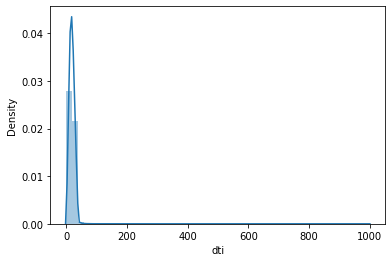

In [ ]:
sns.distplot(df_accepted_dropped['dti'].dropna())

In [114]:
df_copy = df_accepted_dropped.copy(deep= True) 

In [ ]:
# sns.heatmap(df_accepted_dropped)

In [118]:
df_copy['emp_length'].unique()

array([11.,  3.,  4.,  6.,  7.,  8.,  2.,  5.,  9.,  0.,  1.])

In [116]:
#replaced all the values with their respective int values
df_copy['emp_length'] = df_copy['emp_length'].replace({'11 years': 11, '3 years': 3, '4 years': 4, '6 years': 6, '7 years': 7, '8 years': 8,
       '2 years': 2, '5 years': 5, '9 years': 9, '0 years': 0, '1 year': 1, 'nan': 0})

In [117]:
df_copy['emp_length'] = df_copy['emp_length'].fillna(0)

In [121]:
df_copy['term'].unique()

array([0, 1])

In [120]:
#replaced value {36: 0, 60: 1}
df_copy['term'] = df_copy['term'].replace({' 36 months': 0, ' 60 months': 1})

In [122]:
df_copy['home_ownership'].unique()

array(['MORTGAGE', 'RENT', 'OWN', 'ANY', 'NONE', 'OTHER'], dtype=object)

In [31]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1348059 entries, 0 to 2260697
Data columns (total 18 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   loan_amnt            1348059 non-null  float64
 1   term                 1348059 non-null  object 
 2   int_rate             1348059 non-null  float64
 3   installment          1348059 non-null  float64
 4   sub_grade            1348059 non-null  object 
 5   emp_length           1269514 non-null  object 
 6   home_ownership       1348059 non-null  object 
 7   annual_inc           1348055 non-null  float64
 8   verification_status  1348059 non-null  object 
 9   loan_status          1348059 non-null  object 
 10  purpose              1348059 non-null  object 
 11  dti                  1347685 non-null  float64
 12  fico_range_low       1348059 non-null  float64
 13  pub_rec              1348030 non-null  float64
 14  revol_util           1347162 non-null  float64
 15

In [32]:
miss_values_accepted = null_values(df_accepted_dropped)
miss_values_accepted.head(7)

Dataframe has 18 columns.
There are 7 columns that have missing values.


,Missing Values,% of Total Values
emp_length,78545,5.83
avg_cur_bal,70298,5.21
mort_acc,50030,3.71
revol_util,897,0.07
dti,374,0.03
pub_rec,29,0.00
annual_inc,4,0.00


In [33]:
def reject_outliers(sr, iq_range=0.5, side='left', return_mask=False):
    """
    Takes an array (or pandas series) and returns an array with outliers excluded, according to the
    interquartile range.
    
    Parameters:
    -----------
    sr: array
        array of numeric values
    iq_range: float
        percent to calculate quartiles by, 0.5 will yield 25% and 75%ile quartiles
    side: string
        if 'left', will return everything below the highest quartile
        if 'right', will return everything above the lowest quartile
        if 'both', will return everything between the high and low quartiles
    """
    pcnt = (1 - iq_range) / 2
    qlow, median, qhigh = sr.dropna().quantile([pcnt, 0.50, 1-pcnt])
    print(qlow, median, qhigh)
    iqr = qhigh - qlow
    if side=='both':
        mask = (sr - median).abs() <= iqr
    elif side=='left':
        mask = (sr - median) <= iqr
    elif side=='right':
        mask = (sr - median) >= iqr
    else:
        print('options for side are left, right, or both')
    
    if return_mask:
        return mask
    
    return sr[mask]

In [34]:
def plot_feature(sr, iq_range, return_mask):
  no_outliers = reject_outliers(sr = sr, iq_range = iq_range, return_mask = return_mask)
  df_no_outlier =  sr.loc[no_outliers]
  sns.distplot(df_no_outlier)
  return no_outliers


In [51]:
#dti
df_copy['dti'] = df_copy['dti'].mask(df_copy['dti'].isna(), df_copy['dti'].mean())

6.209999999999999 17.61 31.23


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


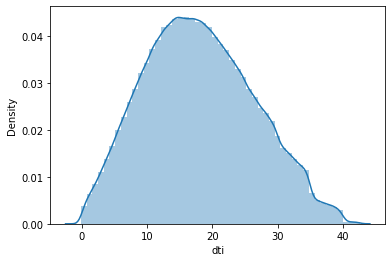

In [52]:
dti_no_outliers = plot_feature(df_copy['dti'], iq_range=0.85, return_mask = True)

In [53]:
df_copy['dti'] = df_copy['dti'].mask(dti_no_outliers == False)

In [54]:
df_copy['dti'] = df_copy['dti'].mask(df_copy['dti'].isna(), df_copy['dti'].mean())

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


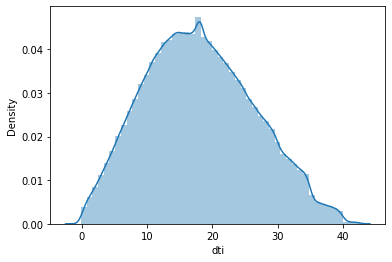

In [55]:
sns.distplot(df_copy['dti'])

26000.0 65000.0 168071.47999999928


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


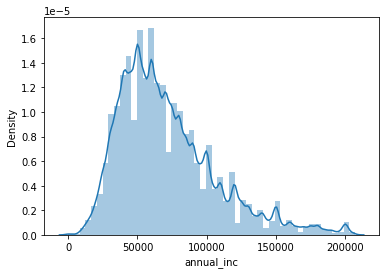

In [56]:
# annual income
df_copy['annual_inc'] = df_copy['annual_inc'].mask(df_copy['annual_inc'].isna(), df_copy['annual_inc'].median())
inc_no_outliers = plot_feature(df_copy['annual_inc'], iq_range=0.92, return_mask = True)
df_copy['annual_inc'] = df_copy['annual_inc'].mask(inc_no_outliers == False)
df_copy['annual_inc'] = df_copy['annual_inc'].mask(df_copy['annual_inc'].isna(), df_copy['annual_inc'].mean())


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


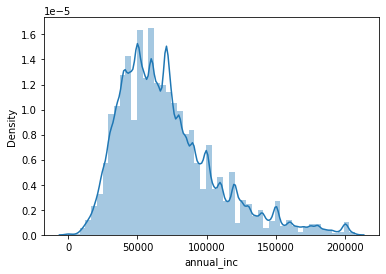

In [57]:
sns.distplot(df_copy['annual_inc'])

86.72999999999999 375.04 1085.48


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


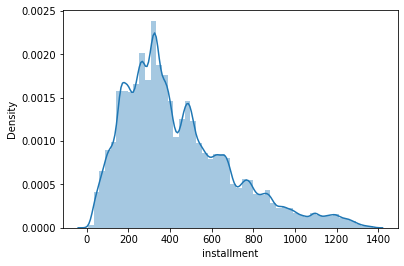

In [58]:
# installment
df_copy['installment'] = df_copy['installment'].mask(df_copy['installment'].isna(), df_copy['installment'].mean())
inst_no_outliers = plot_feature(df_copy['installment'], iq_range=0.94, return_mask = True)
df_copy['installment'] = df_copy['installment'].mask(inst_no_outliers == False)
df_copy['installment'] = df_copy['installment'].mask(df_copy['installment'].isna(), df_copy['installment'].mean())


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


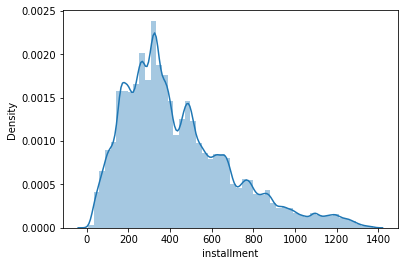

In [59]:
sns.distplot(df_copy['installment'])

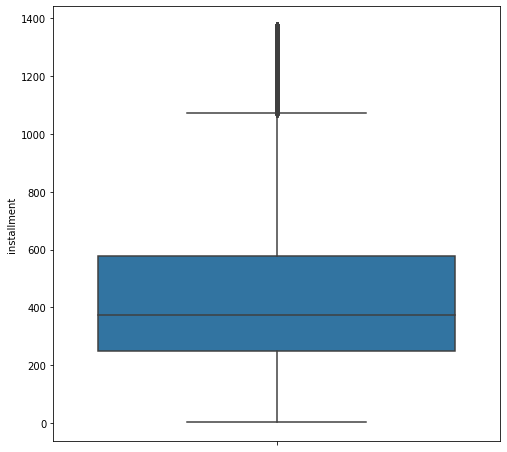

In [60]:
plt.figure(figsize=(8,8))
sns.boxplot( y=df_copy["installment"] )

32.6 52.2 71.6


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


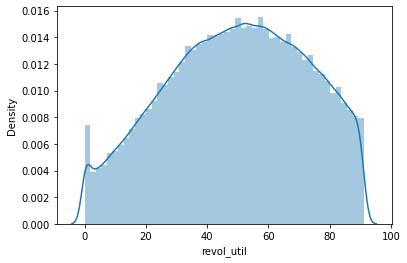

In [61]:
# revol_util
df_copy['revol_util'] = df_copy['revol_util'].mask(df_copy['revol_util'].isna(), df_copy['revol_util'].mean())
ru_no_outliers = plot_feature(df_copy['revol_util'], iq_range=0.52, return_mask = True)
df_copy['revol_util'] = df_copy['revol_util'].mask(ru_no_outliers == False)
df_copy['revol_util'] = df_copy['revol_util'].mask(df_copy['revol_util'].isna(), df_copy['revol_util'].median())


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


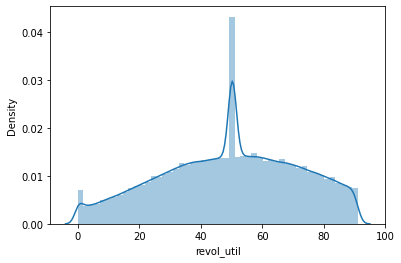

In [62]:
sns.distplot(df_copy['revol_util'])

0.0 0.0 86.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


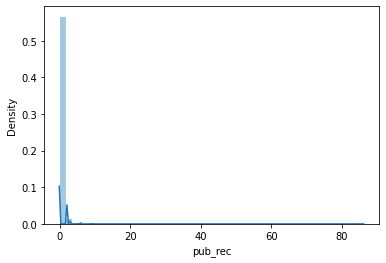

In [69]:
# pub_rec: just replaced nan vlues in this column

df_copy['pub_rec'] = df_copy['pub_rec'].mask(df_copy['pub_rec'].isna(), df_copy['pub_rec'].mean())
# ru_no_outliers = plot_feature(df_copy['pub_rec'], iq_range=1, return_mask = True)

In [ ]:
'''In case if there are outliers in this column'''
# df_copy['pub_rec'] = df_copy['pub_rec'].mask(ru_no_outliers == False)
# df_copy['pub_rec'] = df_copy['pub_rec'].mask(df_copy['pub_rec'].isna(), df_copy['pub_rec'].median())

In [86]:
df_copy['pub_rec'].value_counts().sort_values(ascending=False)

0.000000     1119890
1.000000      191027
2.000000       24448
3.000000        7402
4.000000        2630
5.000000        1267
6.000000         636
7.000000         283
8.000000         160
9.000000          83
10.000000         57
11.000000         40
0.215048          29
12.000000         27
13.000000         18
15.000000          9
21.000000          6
18.000000          6
19.000000          5
16.000000          5
14.000000          5
17.000000          3
28.000000          3
20.000000          3
49.000000          2
24.000000          2
22.000000          2
37.000000          1
23.000000          1
40.000000          1
46.000000          1
47.000000          1
86.000000          1
54.000000          1
61.000000          1
63.000000          1
25.000000          1
34.000000          1
Name: pub_rec, dtype: int64

1694.0 8316.0 31434.199999999953


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


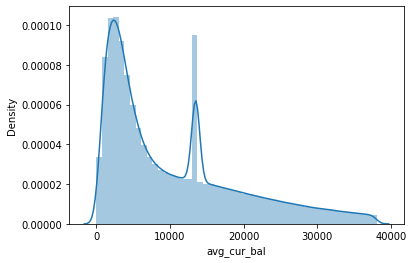

In [99]:
# avg_cur_bal
# df_copy_a = df_accepted_dropped.copy(deep= True)
df_copy['avg_cur_bal'] = df_copy['avg_cur_bal'].mask(df_copy['avg_cur_bal'].isna(), df_copy['avg_cur_bal'].median())
avgcb_no_outliers = plot_feature(df_copy['avg_cur_bal'], iq_range=0.8, return_mask = True)
df_copy['avg_cur_bal'] = df_copy['avg_cur_bal'].mask(avgcb_no_outliers == False)
df_copy['avg_cur_bal'] = df_copy['avg_cur_bal'].mask(df_copy['avg_cur_bal'].isna(), df_copy['avg_cur_bal'].mean())

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


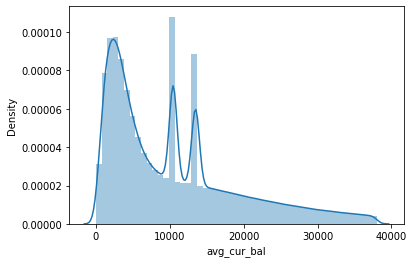

In [100]:
sns.distplot(df_copy['avg_cur_bal'])

In [102]:
np.sort(df_copy['mort_acc'].unique())

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 34., 35., 36., 37., 47., 51.,
       nan])

In [ ]:
# mort_acc
df_copy['mort_acc'] = df_copy['mort_acc'].mask(df_copy['mort_acc'].isna(), df_copy['mort_acc'].mean())


0.0 1.0 8.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


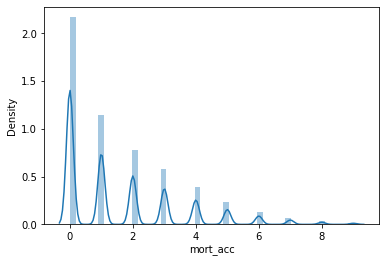

In [ ]:
la_no_outliers = reject_outliers(df_copy['mort_acc'], iq_range=0.98, return_mask = True) 
df_accepted_dropped_an = df_copy.loc[la_no_outliers]
f = sns.distplot(df_accepted_dropped_an['mort_acc'])

In [ ]:
df_copy['mort_acc'] = df_accepted_dropped['mort_acc'].mask(la_no_outliers == False, df_copy['mort_acc'].median())

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


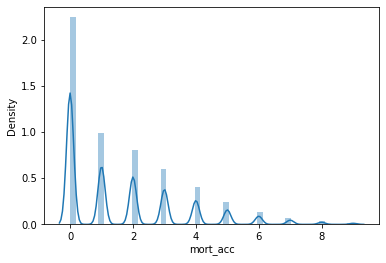

In [ ]:
sns.distplot(df_copy['mort_acc'])

In [ ]:
# df_rejected.shape

In [ ]:
# df_rejected.head()

In [ ]:
# miss_values_rejected = null_values(df_rejected)
# miss_values_rejected.head(6)

In [ ]:
# common_columns = np.intersect1d(df_accepted.columns, df_rejected.columns)